## HU 3: Análisis exploratorio con Python

1. Importación de librerías

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


2. Cargar el dataset limpio

In [9]:
df = pd.read_csv("ventas_limpio.csv", encoding="utf-8")
df.head(50)


,Ciudad,Fecha,Producto,Tipo_Producto,Cantidad,Precio_Unitario,Tipo_Venta,Tipo_Cliente,Descuento,Costo_Envio,...,Fecha_era_nulo,Producto_era_nulo,Tipo_Producto_era_nulo,Cantidad_era_nulo,Precio_Unitario_era_nulo,Tipo_Venta_era_nulo,Tipo_Cliente_era_nulo,Descuento_era_nulo,Costo_Envio_era_nulo,Total_Pagado_era_nulo
0,Santiago,2025-10-30,Arepa,Abarrotes,2.0,3681.0,Online,Minorista,0.20,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Cordoba,2025-11-17,Arepa,Abarrotes,7.0,2321.0,Distribuidor,Gobierno,0.15,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Barranquilla,2025-10-22,Leche,Lacteo,9.0,3540.0,Distribuidor,Gobierno,0.20,0.0,...,0,0,0,0,0,0,0,0,0,0
3,New York,2025-10-20,Cereal,Abarrotes,3.0,3287.0,Tiendafisica,Gobierno,0.05,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Madrid,2025-10-20,Leche,Lacteo,2.0,3414.0,Distribuidor,Mayorista,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
5,Pereira,2025-11-13,Queso,Alimento Perecedero,5.0,2514.0,Distribuidor,Mayorista,0.15,0.0,...,0,0,0,0,0,0,0,0,0,0
6,New York,2025-11-17,Queso,Alimento Perecedero,8.0,1924.0,Online,Minorista,0.05,10000.0,...,0,0,0,0,0,0,0,0,0,0
7,Trujillo,2025-11-03,Arepa,Abarrotes,6.0,3172.0,Distribuidor,Corporativo,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
8,Valencia,2025-11-13,Chocolate,Snack,9.0,4015.0,Tiendafisica,Minorista,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
9,New York,2025-11-15,Queso,Alimento Perecedero,9.0,1649.0,Callcenter,Mayorista,0.10,10000.0,...,0,0,0,0,0,0,0,0,0,0


3. Conversión de tipos de datos requeridos

In [10]:
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year


4. ANÁLISIS VISUAL — SEABORN + MATPLOTLIB

4.1 Distribución de Ventas por Mes


C:\Users\user10\AppData\Local\Temp\ipykernel_4796\3046974968.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Mes", y="Total_Pagado", estimator=sum, ci=None)


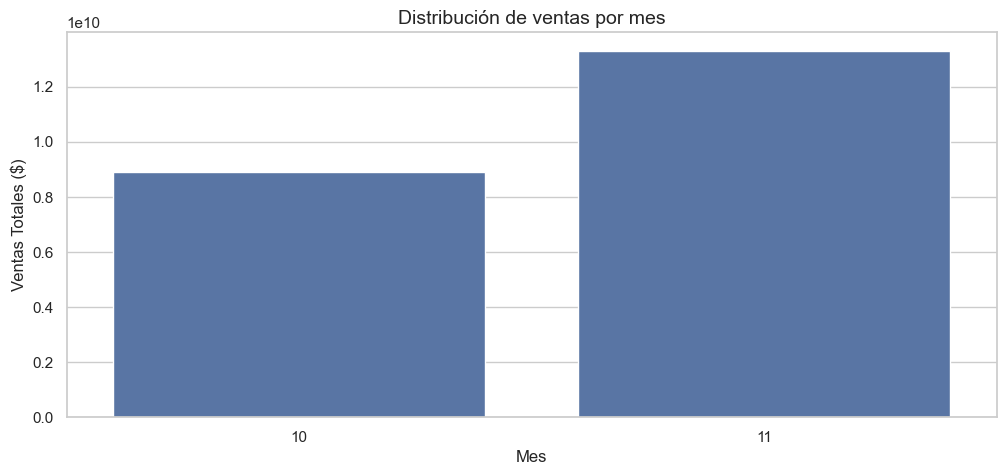

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Mes", y="Total_Pagado", estimator=sum, ci=None)
plt.title("Distribución de ventas por mes", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Ventas Totales ($)")
plt.show()


4.2 Top 5 Productos Más Vendidos (por cantidad)

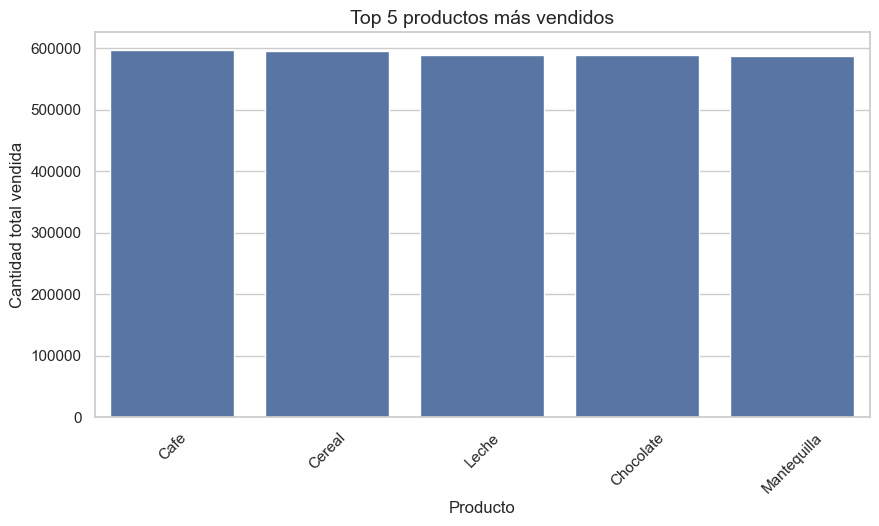

In [12]:
top5 = df.groupby("Producto")["Cantidad"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top5.index, y=top5.values)
plt.title("Top 5 productos más vendidos", fontsize=14)
plt.xlabel("Producto")
plt.ylabel("Cantidad total vendida")
plt.xticks(rotation=45)
plt.show()


4.3 Comparativa ventas Año Actual vs Año Anterior

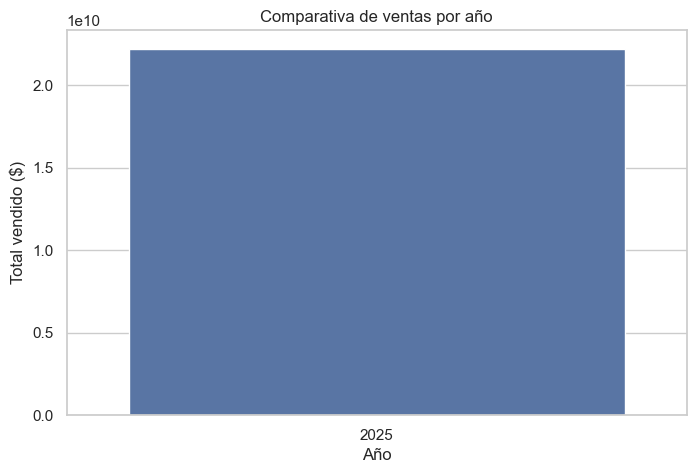

In [13]:
ventas_anuales = df.groupby("Año")["Total_Pagado"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=ventas_anuales, x="Año", y="Total_Pagado")
plt.title("Comparativa de ventas por año")
plt.xlabel("Año")
plt.ylabel("Total vendido ($)")
plt.show()


In [14]:
df["Año"].unique()


array([2025], dtype=int32)

In [15]:
df["Año"].value_counts()


Año
2025    1245898
Name: count, dtype: int64

In [16]:
df["Fecha"].min(), df["Fecha"].max()


(Timestamp('2025-10-20 00:00:00'), Timestamp('2025-11-18 00:00:00'))

El dataset disponible contiene únicamente ventas del año 2025. Por lo tanto, no es posible realizar una comparación interanual significativa entre 2024 y 2025

In [17]:
import pandas as pd

# Seleccionar solo las columnas numéricas
columnas_numericas = ["Cantidad", "Precio_Unitario", "Descuento", "Costo_Envio", "Total_Pagado"]

# Calcular métricas descriptivas
metricas = df[columnas_numericas].agg(["mean", "median", "std"]).T

metricas.columns = ["Media", "Mediana", "Desviación_Estándar"]

metricas


,Media,Mediana,Desviación_Estándar
Cantidad,5.654746,6.0,9.564929
Precio_Unitario,3085.814084,2998.0,5928.546124
Descuento,0.099841,0.1,0.070649
Costo_Envio,2561.670378,0.0,5801.629187
Total_Pagado,17824.934643,15424.0,23492.398356


## Análisis de métricas descriptivas

A partir de las métricas calculadas para las variables numéricas del dataset, se identifican los siguientes hallazgos relevantes:

### Cantidad
- **Media:** 5.65 unidades  
- **Mediana:** 6 unidades  
- **Desviación estándar:** 9.56  

La cantidad vendida por transacción es relativamente baja y muy estable alrededor de 6 unidades, pero la desviación estándar alta indica que existen compras atípicas con volúmenes mucho mayores.

### Precio Unitario
- **Media:** $3,085  
- **Mediana:** $2,998  
- **Desviación estándar:** $5,928  

El precio unitario muestra una gran dispersión. Esto sugiere:
- Amplia variedad de productos con rangos de precios muy distintos.  
- Existencia de productos premium o transacciones con valores excepcionalmente altos.  

### Descuento
- **Media:** 0.099  
- **Mediana:** 0.10  
- **Desviación estándar:** 0.070  

El descuento promedio es cercano al **10%**, lo que indica una política comercial consistente. La baja dispersión sugiere que la empresa aplica descuentos uniformes para la mayoría de las transacciones.

### Costo de Envío
- **Media:** $2,561  
- **Mediana:** $0  
- **Desviación estándar:** $5,801  

El costo de envío presenta un comportamiento muy particular:
- La **mediana de 0** revela que más del 50% de las ventas no tienen costo de envío.  
- La alta dispersión muestra que algunas ventas tienen costos logísticos muy elevados, posiblemente asociadas a zonas lejanas o tipos específicos de entrega.

### Total Pagado
- **Media:** $17,824  
- **Mediana:** $15,424  
- **Desviación estándar:** $23,492  

El total pagado por transacción tiene una variabilidad significativa. Esto podría deberse a la combinación de:
- Diferentes cantidades por compra.
- Amplia variación en precios.
- Envíos costosos en determinadas regiones.

---

# Insight general basado en las métricas

El análisis estadístico revela un mercado con un **comportamiento estándar en las compras pequeñas**, pero con **grandes oscilaciones en costos y precios**, lo cual sugiere que el negocio maneja una mezcla de:
- productos económicos,
- compras pequeñas recurrentes,
- y transacciones excepcionales de alto valor.

Estas métricas aportan una base sólida para desarrollar modelos predictivos y segmentaciones, especialmente considerando el comportamiento irregular en costos logísticos y precios.



---
# Insights generados a partir de los gráficos


- **Noviembre** presenta el mayor nivel de facturación, mostrando un crecimiento significativo respecto a octubre.  
- Los **productos esenciales del hogar** dominan las ventas, especialmente *café, cereal, leche, chocolate y mantequilla*.  
- Las ventas disponibles corresponden únicamente al **año 2025**, lo que impide realizar un análisis interanual.  
- Se evidencia una clara **demanda estacional**, concentrada en los últimos meses del año.  

---

### Insights sobre productos y categorías

- Los productos más vendidos pertenecen a categorías de **alta rotación** y consumo básico: Bebida, Snack, Abarrotes y Lácteo.  
- La categoría **Abarrotes** aparece como transversal dentro del top de ventas, indicando una gran variedad interna.  
- El portafolio está completamente orientado a **bienes esenciales**, sin productos premium ni de baja frecuencia de compra.  

---

### Insight sobre el comportamiento de ventas

- La concentración de ventas solo en octubre y noviembre sugiere un **periodo operacional reciente** o un corte de datos puntual.  
- El incremento de ventas en noviembre abre oportunidades para **promociones estratégicas** y planificación de demanda en el último trimestre.  
- La estabilidad en productos esenciales facilita la construcción de **modelos predictivos** y estrategias de fidelización.  

---

### Riesgos y puntos a vigilar

- La dependencia estacional puede generar **picos irregulares** y afectar la estabilidad del negocio.  
- La falta de datos de años anteriores limita la capacidad de análisis histórico y el desarrollo de **forecasting robusto**.  
- Competir en un mercado de consumo básico implica presión por **precios competitivos y márgenes ajustados**.  

---

###  Insight final

El análisis revela un mercado estable y centrado en bienes esenciales, con una estacionalidad marcada hacia finales de año. Esto permite planificar estrategias comerciales más efectivas, optimizar inventarios y dirigir decisiones basadas en la rotación real de productos y las tendencias de demanda.

---

